In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import import_ipynb
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from time import time
from os import environ
from visualize import trainingPlots, discPlot, ROC_curve 
import visualize
from tensorflow.keras.utils import plot_model
# import keras.utils as ker_u
#environ['KERAS_BACKEND'] = 'tensorflow'  # needed on Wisconsin cluster
from keras import backend as K
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical 
from keras.layers import Layer
import matplotlib.pyplot as plt
import statistics

In [81]:
def build_model(nvars, model_name):
    model = Sequential()
    model.add(Dense(14, input_shape=(nvars,), name='input', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, name='output', activation='sigmoid', kernel_initializer='normal'))
    print(model.summary())
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])    
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=18),
        ModelCheckpoint('/localdata/Athar/CNN/models/{}.hdf5'.format(model_name), monitor='val_loss',
                        verbose=0, save_best_only=True,
                        save_weights_only=False, mode='auto',
                        period=1
                        ),
        TensorBoard(log_dir="/localdata/Athar/CNN/logs/{}".format(time()), histogram_freq=200, write_grads=False, write_images=True)
    ]
    return model, callbacks

Should be here
Index(['pxB1', 'pyB1', 'pzB1', 'eB1', 'pxB2', 'pyB2', 'pzB2', 'eB2', 'pxJ1',
       'pyJ1',
       ...
       'd_eta_W2_t21', 'd_phi_W2_t21', 'd_eta_W2_t22', 'd_phi_W2_t22',
       'd_eta_W2_W1', 'd_phi_W2_W1', 'isSM', 'idx', 'sample_names', 'signal'],
      dtype='object', length=576)
BUILD_MODEL
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 14)                8022      
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 120       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________
None
No. Signal Events:     74618
No. Background Events: 244917
len

56/56 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8756 - val_loss: 0.3133 - val_accuracy: 0.8724
Epoch 50/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8761 - val_loss: 0.3136 - val_accuracy: 0.8716
Epoch 51/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.8757 - val_loss: 0.3137 - val_accuracy: 0.8718
Epoch 52/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.8758 - val_loss: 0.3133 - val_accuracy: 0.8727
Epoch 53/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8760 - val_loss: 0.3129 - val_accuracy: 0.8722
Epoch 54/500
56/56 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.8763 - val_loss: 0.3130 - val_accuracy: 0.8724
Epoch 55/500
56/56 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.8758 - val_loss: 0.3127 - val_accuracy: 0.8721
Epoch 56/500
56/56 

Epoch 107/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.8788 - val_loss: 0.3090 - val_accuracy: 0.8747
Epoch 108/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.8790 - val_loss: 0.3090 - val_accuracy: 0.8738
Epoch 109/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.8794 - val_loss: 0.3089 - val_accuracy: 0.8739
Epoch 110/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 0.8791 - val_loss: 0.3095 - val_accuracy: 0.8737
Epoch 111/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2921 - accuracy: 0.8794 - val_loss: 0.3090 - val_accuracy: 0.8746
Epoch 112/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.8793 - val_loss: 0.3087 - val_accuracy: 0.8746
Epoch 113/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.8793 - val_loss: 0.3091 - val_accuracy: 0.8745

56/56 [==============================] - 0s 5ms/step - loss: 0.2885 - accuracy: 0.8804 - val_loss: 0.3081 - val_accuracy: 0.8747
Epoch 165/500
56/56 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8801 - val_loss: 0.3075 - val_accuracy: 0.8749
Epoch 166/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.8803 - val_loss: 0.3078 - val_accuracy: 0.8743
Epoch 167/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.8805 - val_loss: 0.3069 - val_accuracy: 0.8749
Epoch 168/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.8806 - val_loss: 0.3074 - val_accuracy: 0.8751
Epoch 169/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.8807 - val_loss: 0.3069 - val_accuracy: 0.8748
Epoch 170/500
56/56 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.8802 - val_loss: 0.3073 - val_accuracy: 0.8749
Epoch 171/500

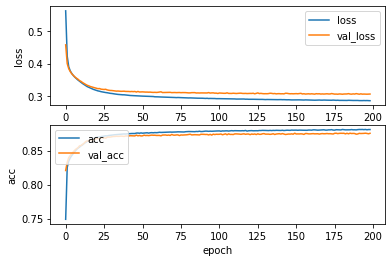

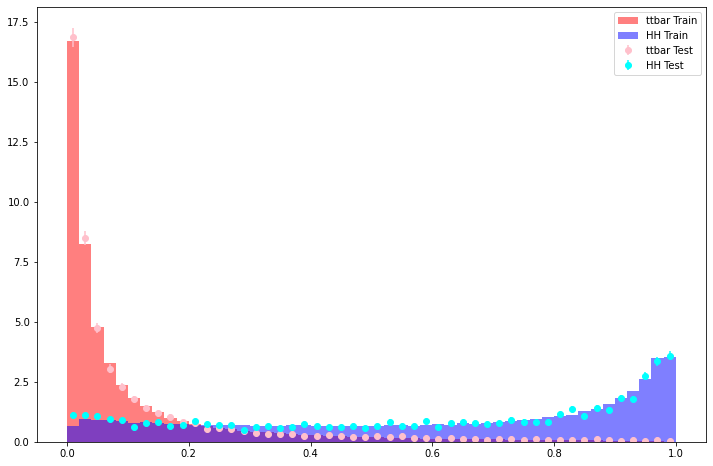

In [82]:
data = pd.HDFStore('/localdata/Athar/CNN/datasets/feat_91.h5',mode="r+")['nominal'] # open dataframe
print("Should be here")
print(data.columns)
training_variables = ['pxB1', 'pyB1', 'pzB1', 'eB1', 'pxB2', 'pyB2', 'pzB2', 'eB2', 'pxJ1', 'pyJ1', 'pzJ1', 'eJ1',
              'pxJ2', 'pyJ2', 'pzJ2', 'eJ2', 'pxL1', 'pyL1', 'pzL1', 'eL1', 'pxN1', 'pyN1', 'pzN1', 'eN1',
              'pxH', 'pyH', 'pzH', 'eH', 'pxt11', 'pyt11', 'pzt11', 'et11', 'pxt12', 'pyt12', 'pzt12',
              'et12', 'pxt21', 'pyt21', 'pzt21', 'et21', 'pxt22', 'pyt22', 'pzt22', 'et22', 'pxW1', 'pyW1', 
              'pzW1', 'eW1', 'pxW2', 'pyW2', 'pzW2', 'eW2', 'm_B1', 'pt_B1', 'eta_B1', 'phi_B1', 'm_B2', 
              'pt_B2', 'eta_B2', 'phi_B2', 'm_J1', 'pt_J1', 'eta_J1', 'phi_J1', 'm_J2', 'pt_J2', 'eta_J2', 
              'phi_J2', 'm_L1', 'pt_L1', 'eta_L1', 'phi_L1', 'm_N1', 'pt_N1', 'eta_N1', 'phi_N1', 'm_H', 
              'pt_H', 'eta_H', 'phi_H', 'm_t11', 'pt_t11', 'eta_t11', 'phi_t11', 'm_t12', 'pt_t12', 
              'eta_t12', 'phi_t12', 'm_t21', 'pt_t21', 'eta_t21', 'phi_t21', 'm_t22', 'pt_t22', 'eta_t22', 
              'phi_t22', 'm_W1', 'pt_W1', 'eta_W1', 'phi_W1', 'm_W2', 'pt_W2', 'eta_W2', 'phi_W2', 
              'dr_B1_B2', 'dr_B1_J1', 'dr_B1_J2', 'dr_B1_L1', 'dr_B1_N1', 'dr_B1_H', 'dr_B1_t11', 
              'dr_B1_t12', 'dr_B1_t21', 'dr_B1_t22', 'dr_B1_W1', 'dr_B1_W2', 'dr_B2_B1', 'dr_B2_J1', 
              'dr_B2_J2', 'dr_B2_L1', 'dr_B2_N1', 'dr_B2_H', 'dr_B2_t11', 'dr_B2_t12', 'dr_B2_t21', 
              'dr_B2_t22', 'dr_B2_W1', 'dr_B2_W2', 'dr_J1_B1', 'dr_J1_B2', 'dr_J1_J2', 'dr_J1_L1', 
              'dr_J1_N1', 'dr_J1_H', 'dr_J1_t11', 'dr_J1_t12', 'dr_J1_t21', 'dr_J1_t22', 'dr_J1_W1', 
              'dr_J1_W2', 'dr_J2_B1', 'dr_J2_B2', 'dr_J2_J1', 'dr_J2_L1', 'dr_J2_N1', 'dr_J2_H', 
              'dr_J2_t11', 'dr_J2_t12', 'dr_J2_t21', 'dr_J2_t22', 'dr_J2_W1', 'dr_J2_W2', 'dr_L1_B1', 
              'dr_L1_B2', 'dr_L1_J1', 'dr_L1_J2', 'dr_L1_N1', 'dr_L1_H', 'dr_L1_t11', 'dr_L1_t12', 
              'dr_L1_t21', 'dr_L1_t22', 'dr_L1_W1', 'dr_L1_W2', 'dr_N1_B1', 'dr_N1_B2', 'dr_N1_J1', 
              'dr_N1_J2', 'dr_N1_L1', 'dr_N1_H', 'dr_N1_t11', 'dr_N1_t12', 'dr_N1_t21', 'dr_N1_t22', 
              'dr_N1_W1', 'dr_N1_W2', 'dr_H_B1', 'dr_H_B2', 'dr_H_J1', 'dr_H_J2', 'dr_H_L1', 'dr_H_N1', 
              'dr_H_t11', 'dr_H_t12', 'dr_H_t21', 'dr_H_t22', 'dr_H_W1', 'dr_H_W2', 'dr_t11_B1', 
              'dr_t11_B2', 'dr_t11_J1', 'dr_t11_J2', 'dr_t11_L1', 'dr_t11_N1', 'dr_t11_H', 'dr_t11_t12', 
              'dr_t11_t21', 'dr_t11_t22', 'dr_t11_W1', 'dr_t11_W2', 'dr_t12_B1', 'dr_t12_B2', 'dr_t12_J1', 
              'dr_t12_J2', 'dr_t12_L1', 'dr_t12_N1', 'dr_t12_H', 'dr_t12_t11', 'dr_t12_t21', 'dr_t12_t22', 
              'dr_t12_W1', 'dr_t12_W2', 'dr_t21_B1', 'dr_t21_B2', 'dr_t21_J1', 'dr_t21_J2', 'dr_t21_L1', 
              'dr_t21_N1', 'dr_t21_H', 'dr_t21_t11', 'dr_t21_t12', 'dr_t21_t22', 'dr_t21_W1', 'dr_t21_W2', 
              'dr_t22_B1', 'dr_t22_B2', 'dr_t22_J1', 'dr_t22_J2', 'dr_t22_L1', 'dr_t22_N1', 'dr_t22_H', 
              'dr_t22_t11', 'dr_t22_t12', 'dr_t22_t21', 'dr_t22_W1', 'dr_t22_W2', 'dr_W1_B1', 'dr_W1_B2', 
              'dr_W1_J1', 'dr_W1_J2', 'dr_W1_L1', 'dr_W1_N1', 'dr_W1_H', 'dr_W1_t11', 'dr_W1_t12', 
              'dr_W1_t21', 'dr_W1_t22', 'dr_W1_W2', 'dr_W2_B1', 'dr_W2_B2', 'dr_W2_J1', 'dr_W2_J2', 
              'dr_W2_L1', 'dr_W2_N1', 'dr_W2_H', 'dr_W2_t11', 'dr_W2_t12', 'dr_W2_t21', 'dr_W2_t22', 
              'dr_W2_W1', 'd_eta_B1_B2', 'd_phi_B1_B2', 'd_eta_B1_J1', 'd_phi_B1_J1', 'd_eta_B1_J2', 
              'd_phi_B1_J2', 'd_eta_B1_L1', 'd_phi_B1_L1', 'd_eta_B1_N1', 'd_phi_B1_N1', 'd_eta_B1_H', 
              'd_phi_B1_H', 'd_eta_B1_t11', 'd_phi_B1_t11', 'd_eta_B1_t12', 'd_phi_B1_t12', 'd_eta_B1_t21', 
              'd_phi_B1_t21', 'd_eta_B1_t22', 'd_phi_B1_t22', 'd_eta_B1_W1', 'd_phi_B1_W1', 'd_eta_B1_W2', 
              'd_phi_B1_W2', 'd_eta_B2_B1', 'd_phi_B2_B1', 'd_eta_B2_J1', 'd_phi_B2_J1', 'd_eta_B2_J2', 
              'd_phi_B2_J2', 'd_eta_B2_L1', 'd_phi_B2_L1', 'd_eta_B2_N1', 'd_phi_B2_N1', 'd_eta_B2_H', 
              'd_phi_B2_H', 'd_eta_B2_t11', 'd_phi_B2_t11', 'd_eta_B2_t12', 'd_phi_B2_t12', 'd_eta_B2_t21', 
              'd_phi_B2_t21', 'd_eta_B2_t22', 'd_phi_B2_t22', 'd_eta_B2_W1', 'd_phi_B2_W1', 'd_eta_B2_W2', 
              'd_phi_B2_W2', 'd_eta_J1_B1', 'd_phi_J1_B1', 'd_eta_J1_B2', 'd_phi_J1_B2', 'd_eta_J1_J2', 
              'd_phi_J1_J2', 'd_eta_J1_L1', 'd_phi_J1_L1', 'd_eta_J1_N1', 'd_phi_J1_N1', 'd_eta_J1_H', 
              'd_phi_J1_H', 'd_eta_J1_t11', 'd_phi_J1_t11', 'd_eta_J1_t12', 'd_phi_J1_t12', 'd_eta_J1_t21', 
              'd_phi_J1_t21', 'd_eta_J1_t22', 'd_phi_J1_t22', 'd_eta_J1_W1', 'd_phi_J1_W1', 'd_eta_J1_W2', 
              'd_phi_J1_W2', 'd_eta_J2_B1', 'd_phi_J2_B1', 'd_eta_J2_B2', 'd_phi_J2_B2', 'd_eta_J2_J1', 
              'd_phi_J2_J1', 'd_eta_J2_L1', 'd_phi_J2_L1', 'd_eta_J2_N1', 'd_phi_J2_N1', 'd_eta_J2_H', 
              'd_phi_J2_H', 'd_eta_J2_t11', 'd_phi_J2_t11', 'd_eta_J2_t12', 'd_phi_J2_t12', 'd_eta_J2_t21', 
              'd_phi_J2_t21', 'd_eta_J2_t22', 'd_phi_J2_t22', 'd_eta_J2_W1', 'd_phi_J2_W1', 'd_eta_J2_W2', 
              'd_phi_J2_W2', 'd_eta_L1_B1', 'd_phi_L1_B1', 'd_eta_L1_B2', 'd_phi_L1_B2', 'd_eta_L1_J1', 
              'd_phi_L1_J1', 'd_eta_L1_J2', 'd_phi_L1_J2', 'd_eta_L1_N1', 'd_phi_L1_N1', 'd_eta_L1_H', 
              'd_phi_L1_H', 'd_eta_L1_t11', 'd_phi_L1_t11', 'd_eta_L1_t12', 'd_phi_L1_t12', 'd_eta_L1_t21', 
              'd_phi_L1_t21', 'd_eta_L1_t22', 'd_phi_L1_t22', 'd_eta_L1_W1', 'd_phi_L1_W1', 'd_eta_L1_W2', 
              'd_phi_L1_W2', 'd_eta_N1_B1', 'd_phi_N1_B1', 'd_eta_N1_B2', 'd_phi_N1_B2', 'd_eta_N1_J1', 
              'd_phi_N1_J1', 'd_eta_N1_J2', 'd_phi_N1_J2', 'd_eta_N1_L1', 'd_phi_N1_L1', 'd_eta_N1_H', 
              'd_phi_N1_H', 'd_eta_N1_t11', 'd_phi_N1_t11', 'd_eta_N1_t12', 'd_phi_N1_t12', 'd_eta_N1_t21', 
              'd_phi_N1_t21', 'd_eta_N1_t22', 'd_phi_N1_t22', 'd_eta_N1_W1', 'd_phi_N1_W1', 'd_eta_N1_W2', 
              'd_phi_N1_W2', 'd_eta_H_B1', 'd_phi_H_B1', 'd_eta_H_B2', 'd_phi_H_B2', 'd_eta_H_J1', 
              'd_phi_H_J1', 'd_eta_H_J2', 'd_phi_H_J2', 'd_eta_H_L1', 'd_phi_H_L1', 'd_eta_H_N1', 
              'd_phi_H_N1', 'd_eta_H_t11', 'd_phi_H_t11', 'd_eta_H_t12', 'd_phi_H_t12', 'd_eta_H_t21', 
              'd_phi_H_t21', 'd_eta_H_t22', 'd_phi_H_t22', 'd_eta_H_W1', 'd_phi_H_W1', 'd_eta_H_W2', 
              'd_phi_H_W2', 'd_eta_t11_B1', 'd_phi_t11_B1', 'd_eta_t11_B2', 'd_phi_t11_B2', 'd_eta_t11_J1', 
              'd_phi_t11_J1', 'd_eta_t11_J2', 'd_phi_t11_J2', 'd_eta_t11_L1', 'd_phi_t11_L1', 'd_eta_t11_N1', 
              'd_phi_t11_N1', 'd_eta_t11_H', 'd_phi_t11_H', 'd_eta_t11_t12', 'd_phi_t11_t12', 
              'd_eta_t11_t21', 'd_phi_t11_t21', 'd_eta_t11_t22', 'd_phi_t11_t22', 'd_eta_t11_W1', 
              'd_phi_t11_W1', 'd_eta_t11_W2', 'd_phi_t11_W2', 'd_eta_t12_B1', 'd_phi_t12_B1', 
              'd_eta_t12_B2', 'd_phi_t12_B2', 'd_eta_t12_J1', 'd_phi_t12_J1', 'd_eta_t12_J2', 
              'd_phi_t12_J2', 'd_eta_t12_L1', 'd_phi_t12_L1', 'd_eta_t12_N1', 'd_phi_t12_N1', 
              'd_eta_t12_H', 'd_phi_t12_H', 'd_eta_t12_t11', 'd_phi_t12_t11', 'd_eta_t12_t21', 
              'd_phi_t12_t21', 'd_eta_t12_t22', 'd_phi_t12_t22', 'd_eta_t12_W1', 'd_phi_t12_W1', 
              'd_eta_t12_W2', 'd_phi_t12_W2', 'd_eta_t21_B1', 'd_phi_t21_B1', 'd_eta_t21_B2', 
              'd_phi_t21_B2', 'd_eta_t21_J1', 'd_phi_t21_J1', 'd_eta_t21_J2', 'd_phi_t21_J2', 
              'd_eta_t21_L1', 'd_phi_t21_L1', 'd_eta_t21_N1', 'd_phi_t21_N1', 'd_eta_t21_H', 
              'd_phi_t21_H', 'd_eta_t21_t11', 'd_phi_t21_t11', 'd_eta_t21_t12', 'd_phi_t21_t12', 
              'd_eta_t21_t22', 'd_phi_t21_t22', 'd_eta_t21_W1', 'd_phi_t21_W1', 'd_eta_t21_W2', 
              'd_phi_t21_W2', 'd_eta_t22_B1', 'd_phi_t22_B1', 'd_eta_t22_B2', 'd_phi_t22_B2', 
              'd_eta_t22_J1', 'd_phi_t22_J1', 'd_eta_t22_J2', 'd_phi_t22_J2', 'd_eta_t22_L1', 
              'd_phi_t22_L1', 'd_eta_t22_N1', 'd_phi_t22_N1', 'd_eta_t22_H', 'd_phi_t22_H', 
              'd_eta_t22_t11', 'd_phi_t22_t11', 'd_eta_t22_t12', 'd_phi_t22_t12', 'd_eta_t22_t21', 
              'd_phi_t22_t21', 'd_eta_t22_W1', 'd_phi_t22_W1', 'd_eta_t22_W2', 'd_phi_t22_W2', 
              'd_eta_W1_B1', 'd_phi_W1_B1', 'd_eta_W1_B2', 'd_phi_W1_B2', 'd_eta_W1_J1', 'd_phi_W1_J1', 
              'd_eta_W1_J2', 'd_phi_W1_J2', 'd_eta_W1_L1', 'd_phi_W1_L1', 'd_eta_W1_N1', 'd_phi_W1_N1', 
              'd_eta_W1_H', 'd_phi_W1_H', 'd_eta_W1_t11', 'd_phi_W1_t11', 'd_eta_W1_t12', 'd_phi_W1_t12', 
              'd_eta_W1_t21', 'd_phi_W1_t21', 'd_eta_W1_t22', 'd_phi_W1_t22', 'd_eta_W1_W2', 'd_phi_W1_W2', 
              'd_eta_W2_B1', 'd_phi_W2_B1', 'd_eta_W2_B2', 'd_phi_W2_B2', 'd_eta_W2_J1', 'd_phi_W2_J1', 
              'd_eta_W2_J2', 'd_phi_W2_J2', 'd_eta_W2_L1', 'd_phi_W2_L1', 'd_eta_W2_N1', 'd_phi_W2_N1', 
              'd_eta_W2_H', 'd_phi_W2_H', 'd_eta_W2_t11', 'd_phi_W2_t11', 'd_eta_W2_t12', 'd_phi_W2_t12', 
              'd_eta_W2_t21', 'd_phi_W2_t21', 'd_eta_W2_t22', 'd_phi_W2_t22', 'd_eta_W2_W1', 'd_phi_W2_W1'
             ]
print ("BUILD_MODEL")
nvars = len(training_variables)
name = 'model_9'
model, callbacks = build_model(nvars,name)
sig_df = data[(data['signal'] == 1.0)]
bkg_df = data[(data['signal'] == 0.0)]
print ('No. Signal Events:     {}'.format(len(sig_df)))
print ('No. Background Events: {}'.format(len(bkg_df)))
scaleto = max(len(sig_df), len(bkg_df))
selected_events = pd.concat([sig_df, bkg_df])
print("len(sig_df) = ",len(sig_df))
print("len(bkg_df) = ",len(bkg_df))
training_dataframe = selected_events[training_variables + ['signal']]
print ("TRAIN_TEST_SPLIT")
training_data, testing_data, training_labels, testing_labels= train_test_split(
    training_dataframe[training_variables].values
    ,training_dataframe['signal'].values,test_size=0.05, random_state=7)
print ("WILL PLOT")
print ("START TRAINING")
history = model.fit(training_data, training_labels, shuffle=True,
              epochs=500, batch_size=4096, verbose=True,
              callbacks=callbacks, validation_split=0.25)
plot_model(model, to_file='/localdata/Athar/CNN/plots/{}.png'.format(name)) 
print ("PLOT ROC_curve")
ROC_curve(training_data, training_labels, model, 'ROC_training_{}'.format(name), 'red')
print ("PLOT ROC_curve")
ROC_curve(testing_data, testing_labels, model, 'ROC_testing_{}'.format(name), 'cyan')
print ("PLOT training")
trainingPlots(history, 'trainingPlot_{}'.format(name))
print ("PLOTTING...")
test_sig, test_bkg = [], []
for i in range(len(testing_labels)):
        if testing_labels[i] == 1:
            test_sig.append(testing_data[i, :])
        elif testing_labels[i] == 0:
            test_bkg.append(testing_data[i, :])
train_sig, train_bkg = [], []
for i in range(len(training_labels)):
        if training_labels[i] == 1:
            train_sig.append(training_data[i, :])
        elif training_labels[i] == 0:
            train_bkg.append(training_data[i, :])

print("test_signal: ",np.shape(test_sig))
print("train_signal:",np.shape(train_sig))
print ("discPlot")
discPlot('NN_disc_{}'.format(name), model, np.array(train_sig),
             np.array(train_bkg), np.array(test_sig), np.array(test_bkg))